In [1]:
# Initialize Otter
import otter 
grader = otter.Notebook()

## Homework 2: Pandas Review

**This assignment is due Tuesday, October 14th at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review the commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)
* Split-Apply-Combine operations with `.groupby`
* Joining data with `merge`

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may enter `help(method_name)` to see helpful documentation for that method. If you are still familar with the `datascience` library used in DSCI 101/102, the conversion reference notebook included with the assignment might serve useful. 

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Section 1: Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [3]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

fruit   color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [4]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

color      fruit
0     red      apple
1  orange     orange
2  yellow     banana
3    pink  raspberry

You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [5]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [6]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1.1

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

In [7]:
fruit_info['rank1'] = [1, 2, 3, 4]
fruit_info

fruit   color  rank1
0      apple     red      1
1     orange  orange      2
2     banana  yellow      3
3  raspberry    pink      4

In [8]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the `rank1` column you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

In [9]:
fruit_info_original = fruit_info.drop('rank1', axis=1)
fruit_info_original

fruit   color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3a

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set this new dataframe to `fruit_info_caps`.

In [11]:
fruit_info_caps = fruit_info_original.rename(columns={'fruit':'Fruit', 'color':'Color'})
fruit_info_caps

Fruit   Color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

In [12]:
grader.check("q1_3a")

q1_3a results: All test cases passed!

### Question 1.3b

Oops! When we labeled the color of apples, we forgot to mention that our apple was a Granny Smith. Use `.replace` to convert the value of red to green in the "Color" column. 

In [13]:
fruit_info_caps = fruit_info_caps.replace('red','green')
fruit_info_caps

Fruit   Color
0      apple   green
1     orange  orange
2     banana  yellow
3  raspberry    pink

In [14]:
grader.check("q1_3b")

q1_3b results: All test cases passed!

### Babyname dataset
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`. The cell below builds a dataframe from a .zip file. There should be a total of 6028151 records. If written to a .csv, these data would be significantly larger than .zip file (which is already fairly large)

This cells builds the full `baby_names` DataFrame. It first builds one dataframe per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [15]:
import zipfile
zf = zipfile.ZipFile("./data/namesbystate.zip", 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [16]:
zipfile.ZipFile("./data/namesbystate.zip", 'r')

<zipfile.ZipFile filename='./data/namesbystate.zip' mode='r'>

In [17]:
len(baby_names)

6408041

In [18]:
baby_names.head()

State Sex  Year      Name  Count
0    AK   F  1910      Mary     14
1    AK   F  1910     Annie     12
2    AK   F  1910      Anna     10
3    AK   F  1910  Margaret      8
4    AK   F  1910     Helen      7

## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code (it is fast), it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [19]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [20]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
baby_names.loc[2:5, ['Name']]

Name
2      Anna
3  Margaret
4     Helen
5     Elsie

The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

`iloc[]` lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

As a mnemonic, remember that the i in `iloc` means "integer". 

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [21]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

State Sex  Year   Name  Count
4365811    NY   M  2013  Aaban      6
4367894    NY   M  2014  Aaban      6
4378195    NY   M  2019  Aadam      6
771544     CA   M  2009  Aadan      6
786429     CA   M  2014  Aadan      5

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [22]:
sorted_baby_names.iloc[1:4, 3]

4367894    Aaban
4378195    Aadam
771544     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [23]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
4627738    Annie
4222531    Annie
2272090    Annie
337368     Annie
           ...  
3267232    Helen
1997702    Helen
3302664    Helen
6176186    Helen
4          Helen
Name: Name, Length: 2165783, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [24]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

State Sex  Year  Count
Name                           
Mary        AK   F  1910     14
Annie       AK   F  1910     12
Anna        AK   F  1910     10
Margaret    AK   F  1910      8
Helen       AK   F  1910      7

We can now lookup rows by name directly:

In [25]:
df.loc[['Mary', 'Anna'], :]

State Sex  Year  Count
Name                       
Mary    AK   F  1910     14
Anna    AK   F  1910     10

However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [26]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4, 2:3]

Year
Name          
Annie     1910
Anna      1910
Margaret  1910

### Question 1.4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [27]:
name_and_year = baby_names.loc[:,['Name', 'Year']]

In [28]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&#62;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [29]:
ca = baby_names[baby_names['State'] == 'CA']

### Question 1.5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` dataframe.

Note: Any time you use `p & q` to filter the dataframe, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that the former is a little more idiomatic (readable) while the latter `loc` is typically faster in production. You are free to use whichever one you would like.

In [30]:
result = baby_names[(baby_names['Year']==2000) & (baby_names['Count']>3000)]
result.head()

State Sex  Year     Name  Count
744864    CA   M  2000   Daniel   4342
744865    CA   M  2000  Anthony   3840
744866    CA   M  2000     Jose   3804
744867    CA   M  2000   Andrew   3600
744868    CA   M  2000  Michael   3572

In [31]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Optionally, repeat the exercise from above, but this time using the `query` command.

In [32]:
result_using_query = baby_names.query('Year==2000 and Count>3000')
result_using_query.head(5)

State Sex  Year     Name  Count
744864    CA   M  2000   Daniel   4342
744865    CA   M  2000  Anthony   3840
744866    CA   M  2000     Jose   3804
744867    CA   M  2000   Andrew   3600
744868    CA   M  2000  Michael   3572

### Question 1.6

Some names gain/lose popularity because of cultural phenomena such as a famous pop star. Below, we plot the popularity of the name Britney in California over time. What do you notice about this plot? What might be the cause of the steep spike around the year 2000?

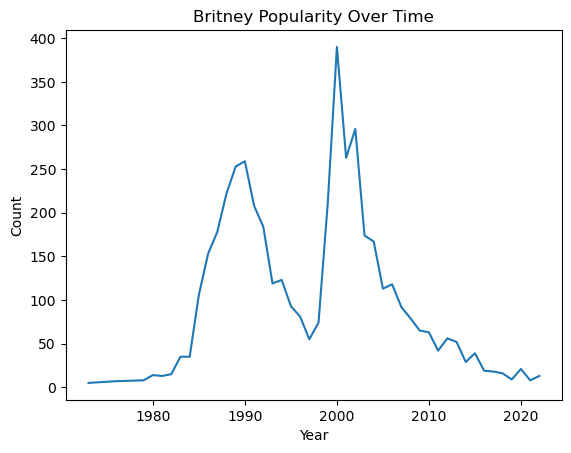

In [33]:
britney_baby_name = baby_names[(baby_names['Name'] == 'Britney') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(britney_baby_name['Year'], britney_baby_name['Count'])
plt.title("Britney Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

**Your Response:** The popularity of the name Britney begins to rise in the mid 1980s, peaking initially around 1990. Then it falls and returns in higher popularity in the year 2000, likely due to the fame of Britney Spears, and then has been slowly declining since the early 2000s.

### Question 1.7

Now we will aggregate counts across all 50 states. Use `groupby()` to aggregate the data by "Name" and "Year", then `sum()` "Count" and finally `reset_index()` (this will turn the index, Name in this case, into a column).  

In [34]:
counts_aggregated_by_name_and_year = baby_names.groupby(['Name', 'Year'])['Count'].sum().reset_index() 
counts_aggregated_by_name_and_year

Name  Year  Count
0          Aaban  2013      6
1          Aaban  2014      6
2          Aadam  2019      6
3          Aadan  2008     12
4          Aadan  2009      6
...          ...   ...    ...
621748    Zyriah  2014      6
621749    Zyriah  2016      5
621750     Zyron  2015      5
621751     Zyrus  2021      5
621752  Zyshonne  1998      5

[621753 rows x 3 columns]

In [35]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Now you can use the below code to plot the frequency of any name of interest in the United States over time. 

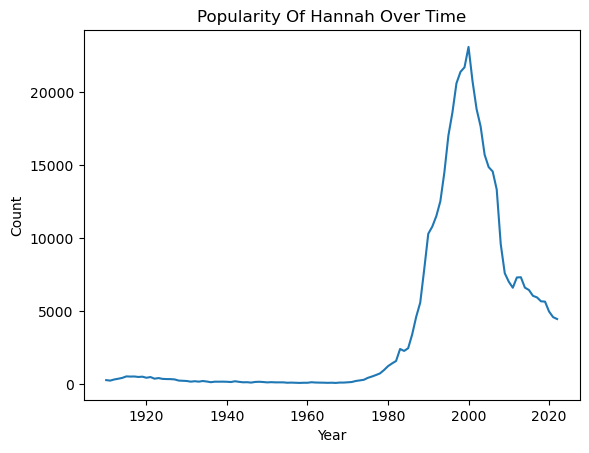

In [36]:
name_of_interest = 'Hannah'
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

Well done. Now that you've been primed on data manipulation with `pandas`, we're going to do a little more practice without as much hand holding to challenge you. 

## Section 2: Filtering and aggregating COVID data

In thi section we'll examine the influence of the COVID pandemic on US jobs across different sectors.

In [37]:
jobs = pd.read_csv("./data/jobs.csv")
jobs

observation_date      jobs  labor_force
0         2014-03-01  150036.0       156028
1         2014-04-01  150233.0       155369
2         2014-05-01  150572.0       155684
3         2014-06-01  151229.0       155707
4         2014-07-01  151245.0       156007
..               ...       ...          ...
103       2022-10-01  169255.0       164679
104       2022-11-01  169187.0       164441
105       2022-12-01  170300.0       164998
106       2023-01-01  170577.0       165871
107       2023-02-01  170150.0       166263

[108 rows x 3 columns]

#### Question 2.1

Let's start by creating a new variable called "difference" in "jobs" that is the available labor force subtracted from jobs. Make this as a new column in your data.

In [38]:
jobs['difference'] = jobs['jobs'] - jobs['labor_force'] 
jobs.head()

observation_date      jobs  labor_force  difference
0       2014-03-01  150036.0       156028     -5992.0
1       2014-04-01  150233.0       155369     -5136.0
2       2014-05-01  150572.0       155684     -5112.0
3       2014-06-01  151229.0       155707     -4478.0
4       2014-07-01  151245.0       156007     -4762.0

In [39]:
grader.check("q2_1")

q2_1 results: All test cases passed!

What do positive and negative differences mean? 

**Your response**: A positive difference means there are more jobs than people available to take them, and vice versa for a negative difference.

#### Question 2.2

For how many months in our time series did the number of jobs exceed the size of the labor force?

In [40]:
months = np.sum(jobs['jobs'] > jobs['labor_force'])
months

47

In [41]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 2.3

Find the date that corresponds to the greatest negative difference between number of jobs and size of the labor force.

In [42]:
jobs.sort_values('difference').iloc[0, 0]

'2020-04-01'

Was there something going on at this point in time?

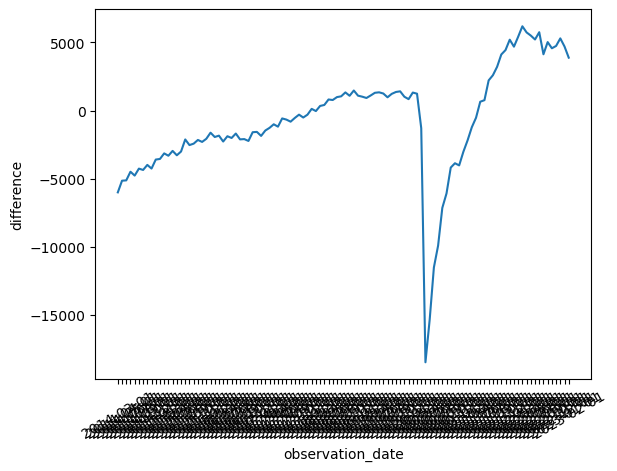

In [43]:
sns.lineplot(x = jobs["observation_date"], y = jobs["difference"])
plt.xticks(rotation=30);

**Your response**: This was the early days of the COVID-19 pandemic, where the lockdown caused significant change in the job market.

#### Question 2.4 

Now we'll look at some data related to corporate profits before and after COVID.

In [44]:
profits = pd.read_csv("./data/corp_profits.csv")
profits["DATE"] = pd.to_datetime(profits["DATE"])
profits.head()

DATE  profits_billions         product
0 2001-01-01            -3.680  motor_vehicles
1 2001-04-01            -6.525  motor_vehicles
2 2001-07-01            -4.313  motor_vehicles
3 2001-10-01           -12.627  motor_vehicles
4 2002-01-01           -11.678  motor_vehicles

What is the date range in our data? Note that we converted "DATE" to a datetime. "datetimes" can be operated on like any numeric variable. 

In [45]:
earliest = min(profits['DATE'])
latest = max(profits['DATE'])

In [46]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5 

How were different industries affected by COVID? First, filter that data such that we only have dates beginning on Jan 1st in 2016 and after. Then create a new column in the data called "COVID" and give the value "pre-covid" if the dates are between 2016-01-01 and 2020-03-01, and "post-covid" for anything after. 

In [47]:
profits_recent = profits.query('DATE>"2016-01-01"')
profits_recent

DATE  profits_billions               product
61  2016-04-01            35.931        motor_vehicles
62  2016-07-01            27.662        motor_vehicles
63  2016-10-01            25.442        motor_vehicles
64  2017-01-01            25.877        motor_vehicles
65  2017-04-01            18.097        motor_vehicles
..         ...               ...                   ...
274 2023-01-01           130.154  computer_electronics
275 2023-04-01           139.027  computer_electronics
276 2023-07-01           146.196  computer_electronics
277 2023-10-01           161.714  computer_electronics
278 2024-01-01           153.667  computer_electronics

[96 rows x 3 columns]

In [48]:
profits_recent['COVID'] = np.where(profits_recent['DATE'] > "2020-03-01", 'post-covid', 'pre-covid')
profits_recent

C:\Users\madel\AppData\Local\Temp\ipykernel_38128\2281220100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_recent['COVID'] = np.where(profits_recent['DATE'] > "2020-03-01", 'post-covid', 'pre-covid')


DATE  profits_billions               product       COVID
61  2016-04-01            35.931        motor_vehicles   pre-covid
62  2016-07-01            27.662        motor_vehicles   pre-covid
63  2016-10-01            25.442        motor_vehicles   pre-covid
64  2017-01-01            25.877        motor_vehicles   pre-covid
65  2017-04-01            18.097        motor_vehicles   pre-covid
..         ...               ...                   ...         ...
274 2023-01-01           130.154  computer_electronics  post-covid
275 2023-04-01           139.027  computer_electronics  post-covid
276 2023-07-01           146.196  computer_electronics  post-covid
277 2023-10-01           161.714  computer_electronics  post-covid
278 2024-01-01           153.667  computer_electronics  post-covid

[96 rows x 4 columns]

In [49]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Questeion 2.6

Now find the average pre- and post-covid profit for each product. Remember that you can group by more than one variable.

In [50]:
grouped_profits = profits_recent.groupby(['product', 'COVID'])['profits_billions'].mean().reset_index()
grouped_profits

product       COVID  profits_billions
0     chemical_products  post-covid        123.618750
1     chemical_products   pre-covid         57.764250
2  computer_electronics  post-covid        131.476188
3  computer_electronics   pre-covid         56.339875
4        motor_vehicles  post-covid         -0.013750
5        motor_vehicles   pre-covid          9.869937

Interpret the findings. Why do you think some industries saw increased profits while others saw decreased profits?

**Your response**: The COVID-19 pandemic likely led people to be more cautious of their hygiene and germ-related cleanliness. This would explain the increase in chemical products profits. Many people also adapted to a remote work lifestyle, increasing the need & spending for computer eletronics and decreasing the need for motor vehicles for commuting.

## Section 3: Cleaning and joining data

We'll end this homework with an exercise in data cleaning and joining multiple relational datasets.

We have two datasets:
1. A dataset of every COVID treatment center in each incorporated township/city in the US
2. A dataset of the estimated population in each incorporated township/city in the US as of 2013.

Our ultimate goal is to determine which cities had the best COVID treatment infrastructure, represented by COVID treatment centers per capita. 

In [51]:
# COVID treatment centers
treat_centers = pd.read_csv("./data/COVID-19_Treatments_20240927.csv")
# Lowercase the town/city names to canonicalize them with the next dataset.
treat_centers["City"] = treat_centers["City"].str.lower()
treat_centers.head()

Provider Name                  Address 1 Address 2         City State  \
0  WALGREENS #3351         6818 N ARMENIA AVE       NaN        tampa    FL   
1   PHARMALIFE LTC  2951 PIEDMONT RD NE STE B       NaN      atlanta    GA   
2  OSCO DRUG #3421               1402 21ST ST       NaN         zion    IL   
3   F & M DRUG LLC              209 N DOUGLAS       NaN    ellsworth    KS   
4    PHARMACY ARTS              31 BURNLEY RD       NaN  scottsville    KY   

         Zip   Latitude  Longitude                      Geopoint  \
0  336045718  28.010111 -82.484895  POINT (-82.484895 28.010111)   
1  303052782  33.834900 -84.367529    POINT (-84.367529 33.8349)   
2  600992304  42.457453 -87.828388  POINT (-87.828388 42.457453)   
3      67439  38.729736 -98.230233  POINT (-98.230233 38.729736)   
4      42164  36.757415 -86.217386  POINT (-86.217386 36.757415)   

       Last Report Date  Has Paxlovid  
0  2024-09-20T00:00:00Z         False  
1  2024-09-20T00:00:00Z         False  
2  2024-09-20T00:00:00Z         False  
3  2024-09-20T00:00:00Z         False  
4  2024-09-20T00:00:00Z         False

#### Question 3.1

Find the number of COVID treatment centers in each town. Remember that each row is a single treatment center, and remember that towns/cities in different states can have the same name. 

*Hint*: The `size()` function will be helpful

In [52]:
treat_counts = treat_centers.groupby(['City', 'State'])['City'].size().reset_index(name='num_centers')
treat_counts

City State  num_centers
0       abbeville    AL            2
1       abbeville    GA            1
2       abbeville    LA            6
3       abbeville    SC            2
4      abbotsford    WI            1
...           ...   ...          ...
11277      zillah    WA            1
11278        zion    IL            5
11279  zionsville    IN            7
11280    zumbrota    MN            1
11281        zuni    NM            1

[11282 rows x 3 columns]

In [53]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 3.2

Let's read in the population data.

In [54]:
# Town/city populations
city_pop = pd.read_csv("./data/pop_est.csv", encoding='latin-1')
city_pop["NAME"] = city_pop["NAME"].str.lower()
city_pop.head()

NAME   STNAME  POPESTIMATE2023
0   abbeville  Alabama             2377
1  adamsville  Alabama             4172
2     addison  Alabama              667
3       akron  Alabama              224
4   alabaster  Alabama            34107

For whatever reason, the population data has many duplicated rows. First, determine how many rows are duplicated. Second, remove those rows from the data.

The easiest way to do this is with the `duplicated` method. The following cell will call up its documentation. 

In [55]:
city_pop.shape

(74541, 3)

In [56]:
duplicates = city_pop.duplicated()
num_duplicates = sum(duplicates)
num_duplicates

30446

In [57]:
city_pop['duplicate'] = duplicates
city_pop = city_pop.query('duplicate==False')#.drop('duplicate', axis=1)
city_pop

NAME   STNAME  POPESTIMATE2023  duplicate
0       abbeville  Alabama             2377      False
1      adamsville  Alabama             4172      False
2         addison  Alabama              667      False
3           akron  Alabama              224      False
4       alabaster  Alabama            34107      False
...           ...      ...              ...        ...
74521  sweetwater  Wyoming            41249      False
74528       teton  Wyoming            23232      False
74530       uinta  Wyoming            20745      False
74535    washakie  Wyoming             7710      False
74538      weston  Wyoming             6808      False

[44095 rows x 4 columns]

In [58]:
grader.check("q3_2")

q3_2 results: All test cases passed!

#### Question 3.3

We're getting close to joining the treatment centers dataframes and the population dataframe on a shared key. We might be tempted to join them on city names but this would be a careless thing to do (remember that different states can have towns/cities with the same name). This is instead a situation where multiple variables combine to form a unique key: town/city name and state. 

This poses an issue for us. While we have states in both frames, they are formatted differently. Thus, to fully relate them we need to pull in a third relation. 

In [59]:
states = pd.read_csv("./data/States.csv")
states.head()

State Standard Postal
0     Alabama     Ala.     AL
1      Alaska   Alaska     AK
2     Arizona    Ariz.     AZ
3    Arkansas     Ark.     AR
4  California   Calif.     CA

Join states on city_pop such that there is one new column in city_pop called "Postal". You may need to `.drop()` a redundant column after joining.

In [60]:
city_pop = pd.merge(city_pop, states, left_on='STNAME', right_on='State', how='left')
city_pop = city_pop.drop('State', axis=1)

In [61]:
grader.check("q3_3")

q3_3 results: All test cases passed!

#### Question 3.4

Now join city_pop and treat_counts. Ensure that you're only keeping rows where there are key matches i.e. do an "inner" join. 

In [62]:
pop_treat_merge = pd.merge(city_pop, treat_counts, left_on=['NAME', 'Postal'], right_on=['City', 'State'], how='inner')
pop_treat_merge = pop_treat_merge.loc[:, ['NAME', 'STNAME', 'POPESTIMATE2023', 'num_centers']]
    
pop_treat_merge

NAME   STNAME  POPESTIMATE2023  num_centers
0       abbeville  Alabama             2377            2
1      adamsville  Alabama             4172            1
2         addison  Alabama              667            2
3       alabaster  Alabama            34107           11
4     albertville  Alabama            23031            9
...           ...      ...              ...          ...
8250        upton  Wyoming              888            1
8251    wheatland  Wyoming             3509            3
8252      worland  Wyoming             4785            2
8253      laramie  Wyoming           100984            5
8254     sheridan  Wyoming            32519            7

[8255 rows x 4 columns]

In [63]:
grader.check("q3_4")

q3_4 results: All test cases passed!

#### Question 3.5

To determine the number of treatment centers per capita, we'll need to divide center count by population. There are certain values of one or the other that could cause issues when calculating this quantity. Use the `describe()` method to summarize the quantitative columns in the merged data. 

In [64]:
# Describe
pop_treat_merge.describe()

POPESTIMATE2023  num_centers
count     8.255000e+03  8255.000000
mean      3.936527e+04     7.217202
std       2.938055e+05    21.746751
min       0.000000e+00     1.000000
25%       2.432500e+03     1.000000
50%       7.364000e+03     3.000000
75%       2.294950e+04     6.000000
max       1.957122e+07   529.000000

In [65]:
pop_treat_merge.query('num_centers>200')

NAME        STNAME  POPESTIMATE2023  num_centers
296        phoenix       Arizona          1650070          208
712    los angeles    California          3820914          359
927    los angeles    California          9663345          359
1357         miami       Florida           455924          299
1383       orlando       Florida           320742          210
1431         tampa       Florida           403364          215
1889       chicago      Illinois          2664452          343
2076       chicago      Illinois                0          343
4607     las vegas        Nevada           660929          256
4793      new york      New York         19571216          529
4827      new york      New York          8258035          529
4863         bronx      New York          1356476          428
4971      new york      New York          1597451          529
6065  philadelphia  Pennsylvania          1550542          373
6718        dallas         Texas          1302868          229
6828       houston         Texas          2314157          514
7032   san antonio         Texas          1495295          312
7155        dallas         Texas          2606358          229
7169       houston         Texas            22066          514

If you identify any issues, filter the data to remove those values. Then create a new column called "centers_per_cap" in pop_treat_merge, representing the number of centers per capita in each town/city.

In [66]:
# Correct any issues if relevant
# Remove cities with population of zero
pop_treat_merge = pop_treat_merge.query('POPESTIMATE2023>0')
pop_treat_merge

NAME   STNAME  POPESTIMATE2023  num_centers
0       abbeville  Alabama             2377            2
1      adamsville  Alabama             4172            1
2         addison  Alabama              667            2
3       alabaster  Alabama            34107           11
4     albertville  Alabama            23031            9
...           ...      ...              ...          ...
8250        upton  Wyoming              888            1
8251    wheatland  Wyoming             3509            3
8252      worland  Wyoming             4785            2
8253      laramie  Wyoming           100984            5
8254     sheridan  Wyoming            32519            7

[8233 rows x 4 columns]

In [67]:
pop_treat_merge['centers_per_cap'] = pop_treat_merge['num_centers'] / pop_treat_merge['POPESTIMATE2023']
pop_treat_merge

C:\Users\madel\AppData\Local\Temp\ipykernel_38128\3885232668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_treat_merge['centers_per_cap'] = pop_treat_merge['num_centers'] / pop_treat_merge['POPESTIMATE2023']


NAME   STNAME  POPESTIMATE2023  num_centers  centers_per_cap
0       abbeville  Alabama             2377            2         0.000841
1      adamsville  Alabama             4172            1         0.000240
2         addison  Alabama              667            2         0.002999
3       alabaster  Alabama            34107           11         0.000323
4     albertville  Alabama            23031            9         0.000391
...           ...      ...              ...          ...              ...
8250        upton  Wyoming              888            1         0.001126
8251    wheatland  Wyoming             3509            3         0.000855
8252      worland  Wyoming             4785            2         0.000418
8253      laramie  Wyoming           100984            5         0.000050
8254     sheridan  Wyoming            32519            7         0.000215

[8233 rows x 5 columns]

In [68]:
grader.check("q3_5")

q3_5 results: All test cases passed!

#### Question 3.6

Identify the five cities with the highest number of treatment cities per capita.

In [69]:
pop_treat_merge.sort_values('centers_per_cap', ascending=False).head(5)

NAME     STNAME  POPESTIMATE2023  num_centers  centers_per_cap
5719  youngstown       Ohio                1           23             23.0
3685     lansing   Michigan                6           36              6.0
2692   manhattan     Kansas                8           16              2.0
3979     mankato  Minnesota                5            9              1.8
5676    bellevue       Ohio                2            3              1.5

Do you think your findings are valid? Why or why not?

**Your response**: No, these results do not seem valid because these five cities have unrealistically low recorded population counts. This artificially inflates the centers per capita statistic for these cities.

#### Question 3.7

Filter the data for only population estimates above or equal to 1000, then again identify the top 5 cities. Return the answer as an array or series. 

In [70]:
pop_treat_merge = pop_treat_merge.query('POPESTIMATE2023>=1000').sort_values('centers_per_cap', ascending=False).head(5)
pop_treat_merge

NAME     STNAME  POPESTIMATE2023  num_centers  centers_per_cap
2698    wichita     Kansas             2082           83         0.039866
7169    houston      Texas            22066          514         0.023294
8206   appleton  Wisconsin             1417           22         0.015526
5679   columbus       Ohio            11314          148         0.013081
7996  green bay  Wisconsin             2207           24         0.010874

In [71]:
top_cities = pop_treat_merge['NAME'][:5]
top_cities

2698      wichita
7169      houston
8206     appleton
5679     columbus
7996    green bay
Name: NAME, dtype: object

In [72]:
grader.check("q3_7")

q3_7 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [73]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3a results: All test cases passed!

q1_3b results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

 - Save and Checkpoint

 - Close and Halt

Then upload your .ipynb file to Canvas assignment Homework 2